In [19]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [20]:
m  = UNITS.meter
s  = UNITS.second
d  = UNITS.day
kg = UNITS.kilogram


G  = 6.674e-11 * m**3 / kg / s**(-2)


init = State(s=Vector(1.496e11,0, units=m), v=Vector(0,30330, units=m/s))

,values
s,"[149600000000.0 meter, 0.0 meter]"
v,"[0 meter / second, 30330 meter / second]"


In [21]:
sys = System(#init  = State(s=Vector(1,0, units=au), v=Vector(0,30330, units=m/s)),
             init  = State(x = 1.496e11 * m, y = 0 * m, vx = 0 * m/s, vy = 30330 * m/s),
             me    = 5.972e24*UNITS.kilogram, 
             ms    = 1.989e30*UNITS.kilogram,
             t_0   = 0 * d,
             t_end = 365.25 * d)

,values
init,x 149600000000.0 meter y ...
me,5.972e+24 kilogram
ms,1.989e+30 kilogram
t_0,0 day
t_end,365.25 day


In [22]:
def universal_gravitation(system, s, v):
    g_magnitude = (- G * system.ms * system.me / (s.mag)**2)
    Fg = s.hat() * g_magnitude 
    
    return Fg

In [23]:
universal_gravitation(sys, Vector(sys.init.x, sys.init.y), Vector(sys.init.x, sys.init.y))

<Quantity([-3.54223686e+22 -0.00000000e+00], 'kilogram * meter * second ** 2')>

In [24]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    
    s = Vector(x,y)
    v = Vector(vx, vy)
    
    #print(s)
    #print(v)

    dsdt = v
    dvdt = (universal_gravitation(system, s, v)/system.me)
    
    #print((universal_gravitation(system.init, system)))
    #print(dvdt)
    
    dxdt = dsdt.x
    dydt = dsdt.y
    dvxdt = dvdt.x
    dvydt = dvdt.y
    
    #print(dxdt)
    #print(dydt)
    #print(dvxdt)
    #print(dvydt)
    
    return dxdt, dydt, dvxdt, dvydt

In [25]:
results, details = run_ode_solver(sys, slope_func, max_step=1*d)
details.message

'The solver successfully reached the end of the integration interval.'

In [26]:
print(results)

                         x             y            vx            vy
0.000000e+00  1.496000e+11  0.000000e+00  0.000000e+00  30330.000000
4.662755e-08  1.496000e+11  1.414214e-03 -2.765670e-10  30330.000000
5.129030e-07  1.496000e+11  1.555635e-02 -3.042237e-09  30330.000000
5.175658e-06  1.496000e+11  1.569777e-01 -3.069894e-08  30330.000000
5.180321e-05  1.496000e+11  1.571191e+00 -3.072660e-07  30330.000000
5.180787e-04  1.496000e+11  1.571333e+01 -3.072936e-06  30330.000000
5.180834e-03  1.496000e+11  1.571347e+02 -3.072964e-05  30330.000000
5.180838e-02  1.496000e+11  1.571348e+03 -3.072967e-04  30330.000000
5.180839e-01  1.496000e+11  1.571348e+04 -3.072967e-03  30330.000000
5.180839e+00  1.496000e+11  1.571348e+05 -3.072967e-02  30330.000000
5.180839e+01  1.496000e+11  1.571348e+06 -3.072967e-01  30329.999998
5.180839e+02  1.496000e+11  1.571348e+07 -3.072967e+00  30329.999839
5.180839e+03  1.495999e+11  1.571348e+08 -3.072966e+01  30329.983861
5.180839e+04  1.495920e+11  1.5713

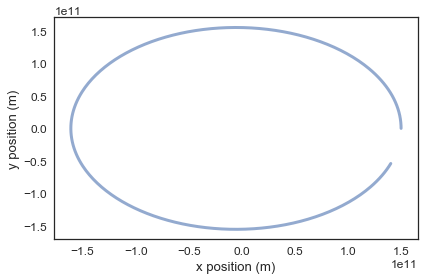

In [27]:
plot(results.x, results.y)
decorate(xlabel = 'x position (m)',
         ylabel = 'y position (m)')

In [28]:
sys2 = System(sys, init  = State(x = 1.496e11 * m, y = 0 * m, vx = 0 * m/s, vy = -30330 * m/s))

,values
init,x 149600000000.0 meter y ...
me,5.972e+24 kilogram
ms,1.989e+30 kilogram
t_0,0 day
t_end,365.25 day


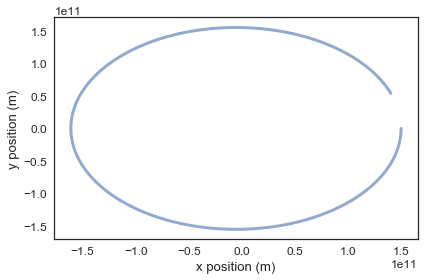

In [56]:
plot(results2.x, results2.y)
decorate(xlabel = 'x position (m)',
         ylabel = 'y position (m)')

In [57]:
results45, details = run_ode_solver(sys, slope_func, max_step=1*d, method = 'RK45')
results34, details = run_ode_solver(sys, slope_func, max_step=1*d, method = 'RK23')
resultsRad, details = run_ode_solver(sys, slope_func, max_step=1*d, method = 'Radau')
resultsLSO, details = run_ode_solver(sys, slope_func, max_step=1*d, method = 'LSODA')
resultsBDF, details = run_ode_solver(sys, slope_func, max_step=1*d, method = 'BDF')

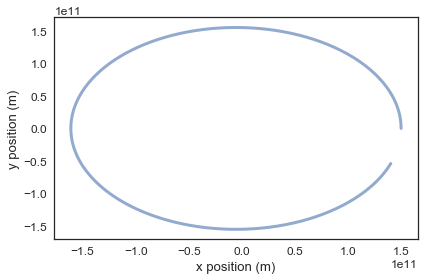

In [58]:
plot(results34.x, results34.y)
decorate(xlabel = 'x position (m)',
         ylabel = 'y position (m)')

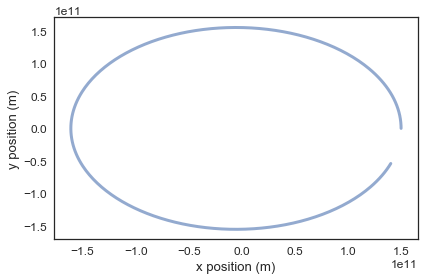

In [59]:
plot(results45.x, results45.y)
decorate(xlabel = 'x position (m)',
         ylabel = 'y position (m)')

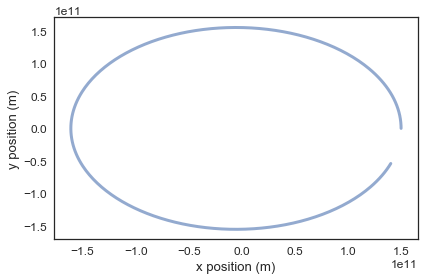

In [60]:
plot(resultsRad.x, resultsRad.y)
decorate(xlabel = 'x position (m)',
         ylabel = 'y position (m)')